# Project 3: House Price Prediction

Objective: Predict house prices based on various features like location, size, and house
characteristics.

### Data Cleaning: Handle missing values, preprocess data (e.g., encoding categorical variables, scaling features), and remove or treat outliers

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

We will open the .csv file to perform exploratory data analysis (EDA) to understand the dataset and
visualize trends.

In [3]:
df = pd.read_csv("house_prices.csv")

In [ ]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Dealing with Outliers

In [4]:
def handle_outlier(col,df):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1

    lower_b=q1-1.5*IQR
    upper_b=q3+1.5*IQR

    for i in range(len(df)):
        if df.loc[i,col]>upper_b :
            df.loc[i,col]=upper_b
        elif df.loc[i,col]<lower_b:
            df.loc[i,col]=lower_b


handle_outlier('OverallQual',df)
handle_outlier('GrLivArea',df)

<ipython-input-4-ee8b5e8992fa>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2747.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,col]=upper_b


In [5]:
df[(df['SaleCondition'].isin(['Normal','Abnorml'])) & (df['Property_Sale_Price']>700000)]

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [6]:
df = df.drop(index=[691,1182])

# Fill NAN Values - Categorical Data

In [7]:
len(df)

1458

## Fill NAN for basement
- **BsmtCond**: Condition of the basement (a rating).
- **BsmtQual**: Quality of the basement (a rating).
- **BsmtFinType1**: Type of finished basement (e.g., rec room, living space).
- **BsmtExposure:** Exposure level of the basement (e.g., walkout, garden level).
- **BsmtFinType2**: Type of secondary finished basement (if applicable).

In [8]:
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [9]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtCond'].isnull()]

,BsmtCond,BsmtQual,BsmtFinType1,BsmtExposure,BsmtFinType2


## Fill NAN for garage
- **GarageQual**: Quality of the garage (a rating).
- **GarageCond**: Condition of the garage (a rating).
- **GarageFinish**: Interior finish of the garage (e.g., unfinished, finished).
- **GarageType**: Type of garage (e.g., attached, detached).

In [10]:
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [11]:
df[['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']][df['GarageQual'].isnull()]

,GarageQual,GarageCond,GarageFinish,GarageType


## Dealing with NAN in MasVnrType

In [12]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [13]:
df[['MasVnrType']].isnull().sum()

,0
MasVnrType,0


## Dealing with NAN in FireplaceQu

In [14]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [15]:
df[['FireplaceQu']].isnull().sum()

,0
FireplaceQu,0


In [16]:
df = df.dropna(axis=0,subset= ['Electrical'])

# Fill NAN Values - Numeric Data

## Dealing with NAN in GarageYrBlt

In [17]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

## Dealing with NAN in LotFrontage

In [18]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

## Dealing with NAN in MasVnrArea

In [19]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [20]:
df[['MasVnrType', 'MasVnrArea']][(df['MasVnrArea'] == 0) & (df['MasVnrType'] != "None")]

,MasVnrType,MasVnrArea
688,BrkFace,0.0
1241,Stone,0.0


In [21]:
df.groupby('MasVnrType')['MasVnrArea'].mean()

,MasVnrArea
MasVnrType,
BrkCmn,247.666667
BrkFace,256.957207
None,1.087356
Stone,239.304688


In [22]:
df.loc[688, 'MasVnrArea'] = 259.008989
df.loc[1241, 'MasVnrArea'] = 239.304688


## Drop Columns

In [23]:
df = df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [24]:
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDriv

# Trandsform Data

## Use log Transform on Property_Sale_Price for better distribution

In [25]:
df['Property_Sale_Price_natural_log'] = np.log(df['Property_Sale_Price'])

## Add new column contains Grage Age

In [26]:
df['GarageAge'] = 2024 - df['GarageYrBlt']

In [27]:
df = df.drop(['GarageYrBlt'], axis=1)

# Display Data

In [28]:
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,Property_Sale_Price_natural_log,GarageAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,12.247694,21.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,12.109011,48.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,12.317167,23.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,11.849398,26.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,12.429216,24.0


## Encoding and Scaling Features

In [29]:
df = pd.get_dummies(df, dtype='int')

In [30]:
df.head()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


## Export Cleaned Data to CSV File

In [ ]:
df.to_csv('cleaned_house_data.csv')

In [31]:
df.drop('Property_Sale_Price',axis=1,inplace=True)

In [32]:
X=df.drop('Property_Sale_Price_natural_log',axis=1)
y=df['Property_Sale_Price_natural_log']


In [33]:
X.shape

(1457, 285)

In [34]:
y.shape

(1457,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

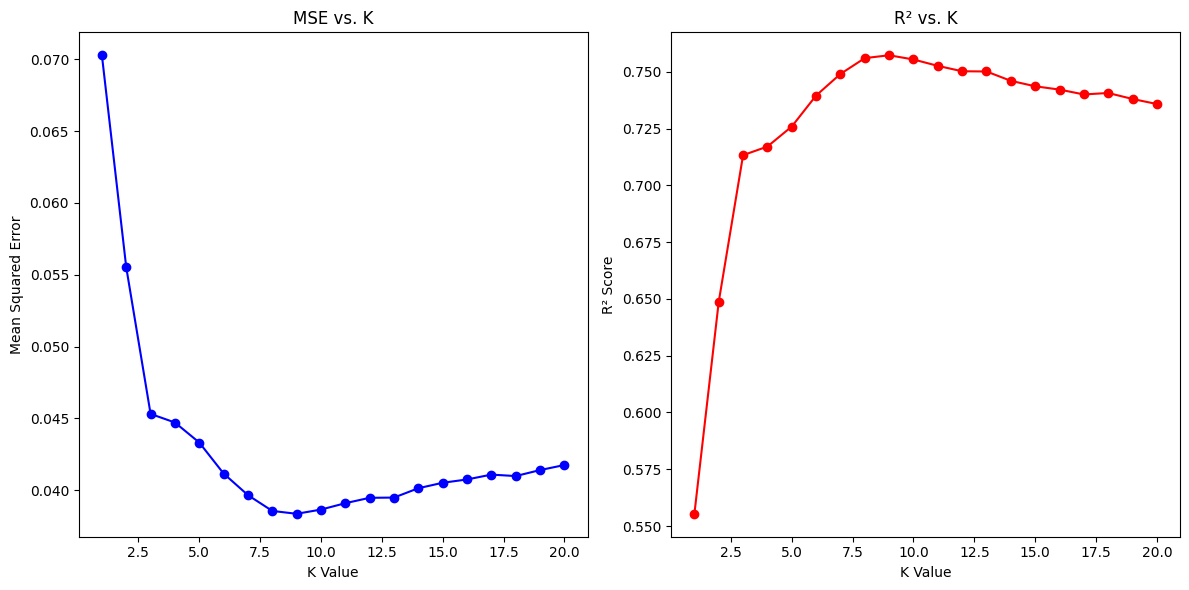

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
# Define a range for k values
k_values = range(1, 21)
mse_values = []
r2_values = []

# Iterate over the range of k values and evaluate performance
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    y_pred = knn.predict(scaled_X_test)

    # Calculate MSE and R² for each k
    mse_values.append(mean_squared_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))

# Plot MSE and R² for different k values
plt.figure(figsize=(12, 6))

# MSE plot
plt.subplot(1, 2, 1)
plt.plot(k_values, mse_values, marker='o', color='b')
plt.title('MSE vs. K')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')

# R² plot
plt.subplot(1, 2, 2)
plt.plot(k_values, r2_values, marker='o', color='r')
plt.title('R² vs. K')
plt.xlabel('K Value')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid: k values from 1 to 20
param_grid = {'n_neighbors': range(1, 21)}

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(scaled_X_train, y_train)

# Get the best parameters and the best score
best_k = grid_search.best_params_
best_score = grid_search.best_score_

best_k, best_score


({'n_neighbors': 5}, -0.038294819666068944)

In [43]:
knn5=KNeighborsRegressor(n_neighbors=5)

In [44]:
knn5.fit(scaled_X_train,y_train)

KNeighborsRegressor()

In [45]:
y_pred5 = knn5.predict(scaled_X_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred5)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred5)
print(f"R-score: {r2}")

Mean Squared Error: 0.043326936351051504
R-score: 0.725885564777908


In [55]:
knn7=KNeighborsRegressor(n_neighbors=7)

In [56]:
knn7.fit(scaled_X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [57]:
y_pred7 = knn7.predict(scaled_X_test)

In [58]:
mse7 = mean_squared_error(y_test, y_pred7)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2)
r2_7 = r2_score(y_test, y_pred7)
print(f"R-score: {r2}")

Mean Squared Error: 0.043326936351051504
R-score: 0.725885564777908


----